## 머신러닝: 분류
 

In [1]:
import pandas as pd
data=pd.read_csv('C:\\Users\\user\\Desktop\\VS code\\bigdata_test\\breast-cancer-wisconsin.csv',encoding='utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [2]:
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [3]:
data.shape

(683, 11)

## 특성(x)과 레이블(y) 나누기

In [4]:
x=data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
X1=data[data.columns[1:10]]
X2=data.loc[:, 'Clump_Thickness':'Mitoses']

In [5]:
X1.shape
X2.shape
x.shape


(683, 9)

In [6]:
y=data[['Class']]

In [7]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
678,0
679,0
680,1
681,1


## train-test 데이터 셋 나누기

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,stratify=y,random_state=42)

In [9]:
Y_train.mean()

Class    0.349609
dtype: float64

In [10]:
Y_test.mean()

Class    0.350877
dtype: float64

## 정규화

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [12]:
#minmax 방식  
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)

In [13]:
#표준화 방식
scaler_standard.fit(X_train)
X_scaled_standard_train=scaler_standard.transform(X_train)

In [14]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,6.938894e-18,6.938894e-18,-2.775558e-17,-2.775558e-17,-4.857226e-17,6.938894e-18,-2.081668e-17,-2.775558e-17,-1.734723e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [16]:
X_scaled_minmax_test=scaler_minmax.transform(X_test)

In [17]:
X_scaled_standard_train=scaler_standard.transform(X_test)

## 모델학습

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_minmax_train,Y_train)

c:\Users\user\anaconda3\envs\baek\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train,Y_train)

0.97265625

In [21]:
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,Y_test)

0.9590643274853801

In [22]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(Y_train,pred_train)
confusion_train
#333명 중 328 맞추고 179명 중 170명 맞춤

array([[328,   5],
       [  9, 170]], dtype=int64)

In [23]:
confusion_test=confusion_matrix(Y_test,pred_test)
confusion_test

array([[106,   5],
       [  2,  58]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(Y_train,pred_train)
cfreport_train

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98       333\n           1       0.97      0.95      0.96       179\n\n    accuracy                           0.97       512\n   macro avg       0.97      0.97      0.97       512\nweighted avg       0.97      0.97      0.97       512\n'

In [27]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(Y_test, model.decision_function(X_scaled_minmax_test))
roc_auc


0.9923423423423423

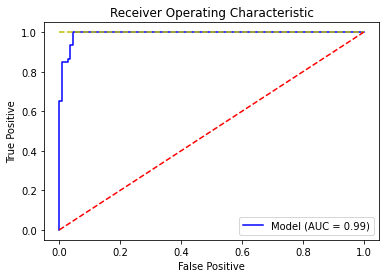

In [30]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [ ]:
prob_train=model.predict_proba